In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('wiki-RfA.csv', index_col=0, parse_dates=['Date'])
df.head()

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."


In [ ]:
df_source =  df.copy(deep=True)

In [ ]:
df_source

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


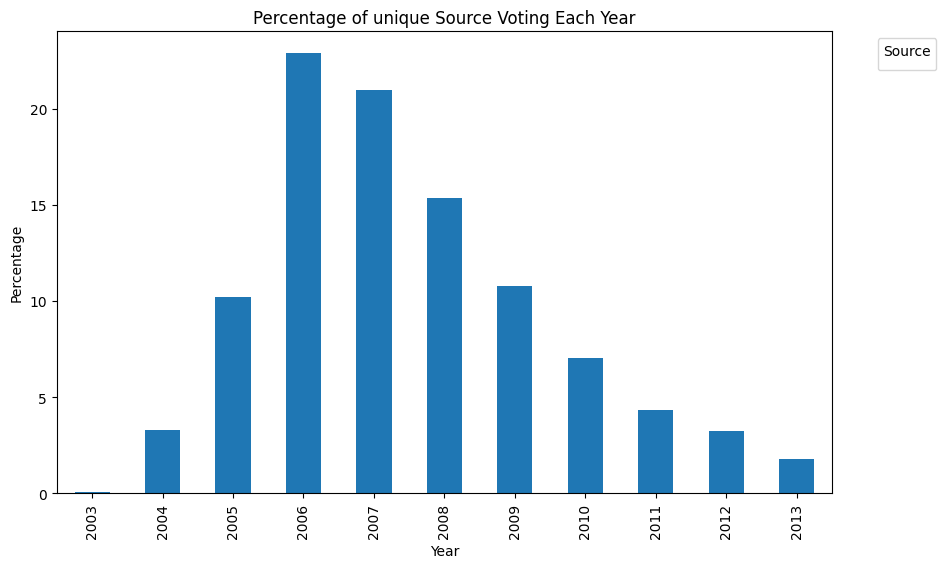

In [ ]:
# Calculate the distribution of the source over the year
vote_percentage = df_source.groupby('Year').size() / df_source.shape[0]*100

# Plotting
vote_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Vote by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

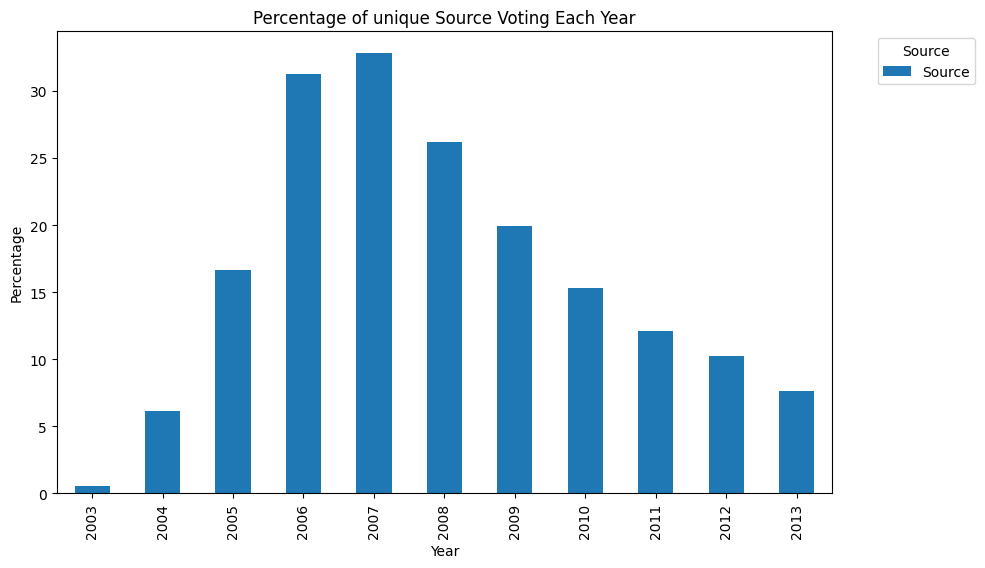

In [43]:
# Calculate the distribution of the source over the year
source_percentage = df_source.groupby('Year')['Source'].nunique() / len(df_source.Source.unique())*100

# Plotting
source_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of unique Source Voting Each Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

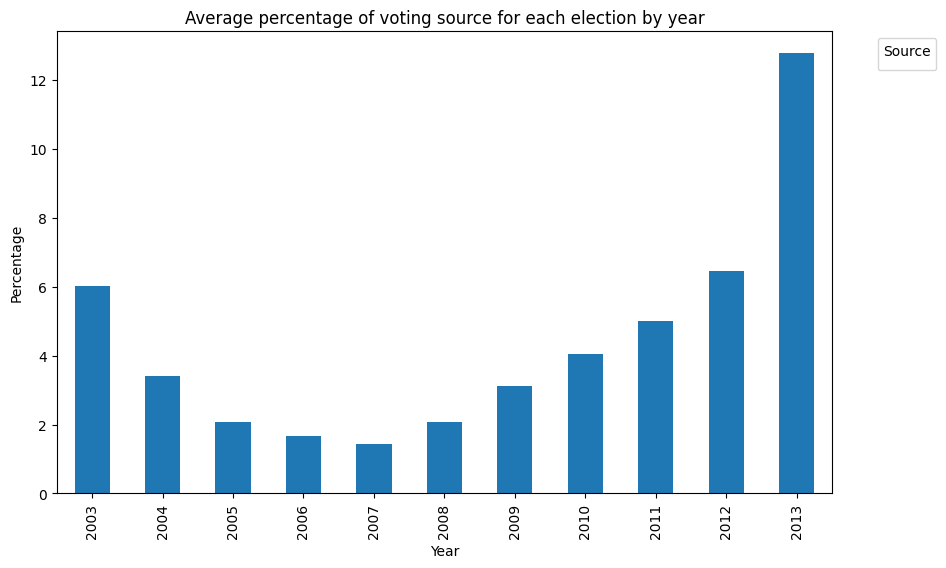

In [42]:
def select_year(data, year):
  return data[data['Year'] == year].reset_index(drop=True)

d={}
for i in range (2003, 2014):
  df_sub = select_year(df_source, i)
  nb_source =  len(df_sub.Source.unique())
  percent_by_target = df_sub.groupby('Target')['Source'].nunique()/nb_source*100
  d.update({i:percent_by_target.mean()})

election_source_percentage =  pd.Series(data=d, index=[2003,2004,2005,2006,2007,2008,2009,2010,2011, 2012, 2013])

election_source_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average percentage of voting source for each election by year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

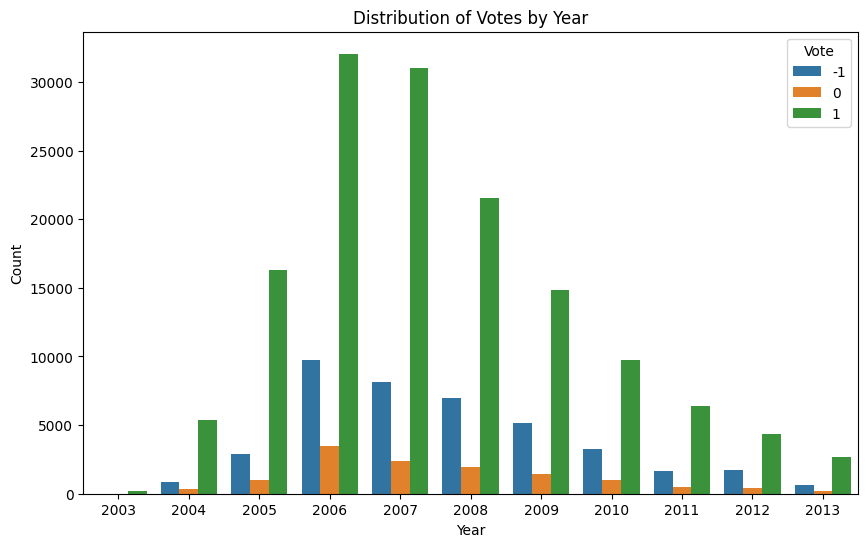

In [44]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', hue='Vote', data=df_source)
plt.title('Distribution of Votes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Vote', loc='upper right', labels=['-1', '0', '1'])
plt.show()

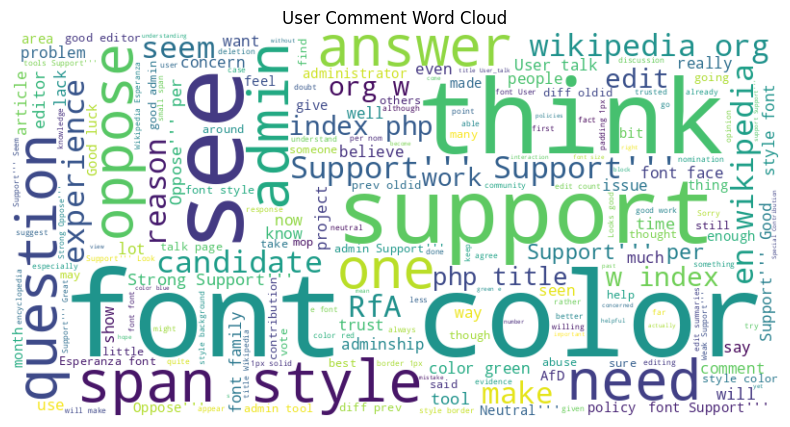

In [48]:
from wordcloud import WordCloud

# Word cloud of the most present word in the comment
user_comments = ' '.join(df_source['Comment'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(user_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('User Comment Word Cloud')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20808 (\N{CJK UNIFIED IDEOGRAPH-5148}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3508 (\N{SINHALA LETTER ALPAPRAANA PAYANNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3523 (\N{SINHALA LETTER DANTAJA SAYANNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/l

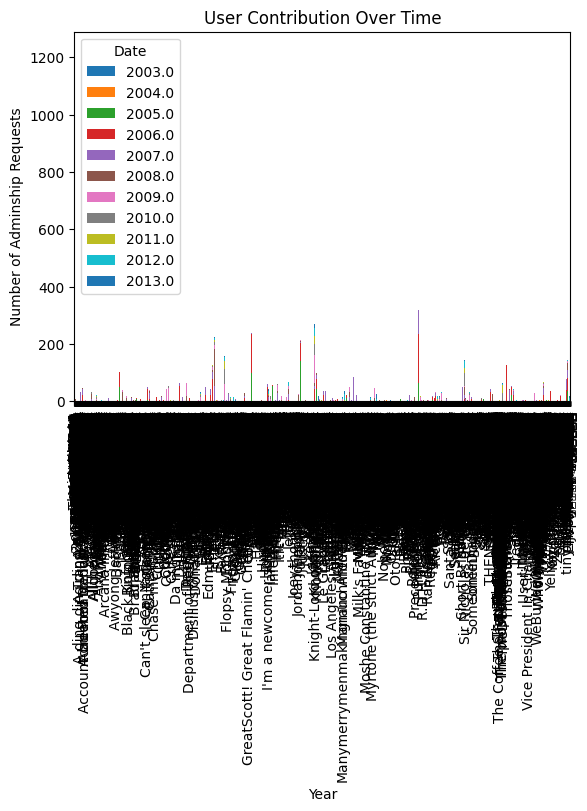

In [49]:
df_source['Date'] = pd.to_datetime(df_source['Date'])
user_contribution_over_time = df_source.groupby(['Source', df_source['Date'].dt.year]).size().unstack(fill_value=0)
user_contribution_over_time.plot(kind='bar', stacked=True)
plt.title('User Contribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Adminship Requests')
plt.show()